In [2]:
#импорт библиотек
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# 1.1 Загрузка данных

## 1.1.1 Загрузка данных

In [44]:
df = pd.read_csv('2019_Yellow_Taxi_Trip_Data.csv')

MemoryError: Unable to allocate 8.17 GiB for an array with shape (13, 84399019) and data type float64

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24648499 entries, 0 to 24648498
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 3.3+ GB


В исходном наборе данных содержится 30904072 записей и 18 атрибутов.

In [4]:
df.isnull().sum()

VendorID                 809568
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          809568
trip_distance                 0
RatecodeID               809568
store_and_fwd_flag       809568
PULocationID                  0
DOLocationID                  0
payment_type             809568
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

Пропущенные данные имеют признаки VendorID, passenger_count, RatecodeID, store_and_fwd_flag, payment_type и congestion_surcharge.

## 1.1.2 Описание набора данных

__VendorID__ - Код, указывающий поставщика TPEP, предоставившего запись.

__tpep_pickup_datetime__ - Дата и время включения счетчика.

__tpep_dropoff_datetime__ - Дата и время отключения счетчика.

__passenger_count__ - Количество пассажиров в автомобиле.

__trip_distance__ - Пройденное расстояние поездки в милях, указанное таксометром.

__RatecodeID__ - Окончательный код тарифа, действующий в конце поездки.

__store_and_fwd_flag__ - Этот флаг указывает, хранилась ли запись о поездке в памяти транспортного средства перед отправкой продавцу, т. е. «сохранить и переслать», поскольку у транспортного средства не было подключения к серверу.

__PULocationID__ - Зона такси TLC, в которой был задействован таксометр.

__DOLocationID__ - Зона такси TLC, в которой был отключен таксометр.

__payment_type__ - Цифровой код, обозначающий, как пассажир оплатил поездку.

__fare_amount__ - Тариф «время-расстояние», рассчитанный счетчиком.

__extra__ - Различные дополнения и доплаты. В настоящее время это включает только 0,50 и 1 доллар в час пик и плату за ночь.

__mta_tax__ - Налог MTA в размере 0,50 доллара США, который автоматически активируется в зависимости от используемой ставки счетчика.

__tip_amount__ - Сумма чаевых — это поле автоматически заполняется для чаевых по кредитной карте. Чаевые наличными не включены.

__tolls_amount__ - Общая сумма всех сборов, уплаченных за поездку.

__improvement_surcharge__ - Доплата за улучшение в размере 0,30 доллара США оценивается в поездках при спуске флага. Доплата за благоустройство взималась с 2015 года.

__total_amount__ - Общая сумма, начисленная пассажирам. Не включает чаевые наличными.

__congestion_surcharge__ - доплата за пробки.

В итоге был загружен набор данных из csv-файла содержащий информацию о о поездках на такси за 2021 год. В исходном наборе данных содержится 30904072 записей и 18 атрибутов.

# 1.2 Формирование структуры набора данных

## 1.2.1 Обработка пропусков

In [13]:
df.isnull().sum()

VendorID                  834028
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1478695
trip_distance                  0
RatecodeID               1478695
store_and_fwd_flag       1478695
PULocationID                   0
DOLocationID                   0
payment_type              834028
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      644667
dtype: int64

### Визуализация процента пустых значений

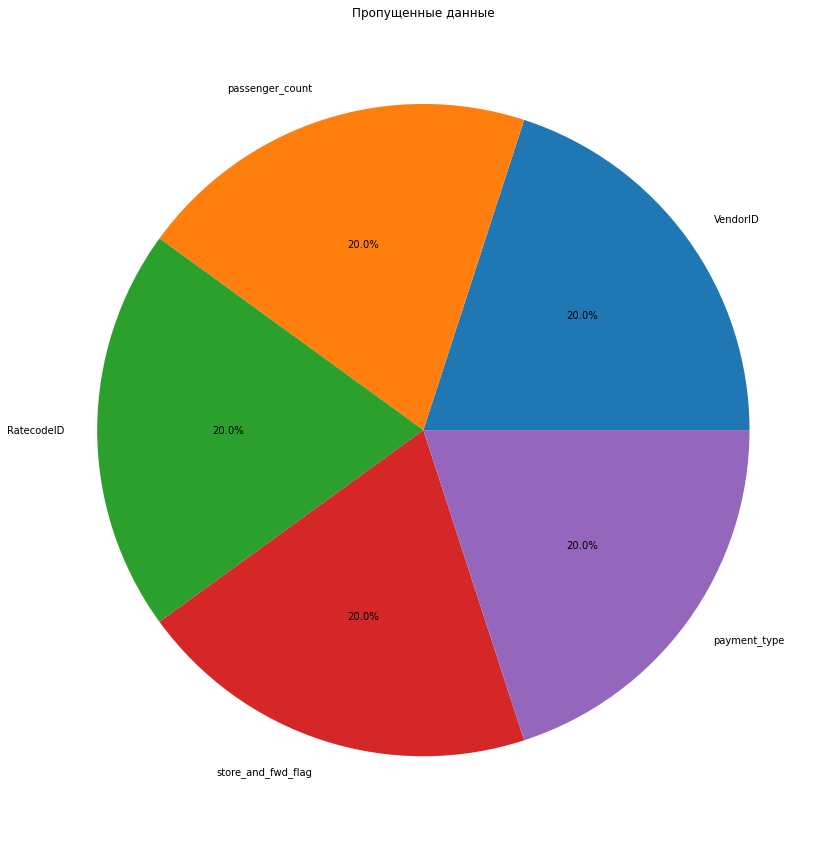

In [6]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
plt.figure(figsize=(15,15))
plt.pie(missing_data, labels=missing_data.index, autopct='%1.1f%%')
plt.title('Пропущенные данные')
plt.show()

Пропуски данных имеют такие атрибуты как VendorID (12.4%), passenger_count (21.9%), RatecodeID (21.9%), store_and_fwd_flag (21.9%), payment_type (12.4%), congestion_surcharge (9.6%).

### Удаление записей с пустыми значениями

In [7]:
df=df[df['VendorID'].notnull()]

In [8]:
df=df[df['passenger_count'].notnull()]

In [9]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

Теперь набор данных не содержит пустых значений.

## 1.2.2 ANOVA F-value

Метод ANOVA F-значения оценивает степень линейности между входным признаком (т. е. предиктором) и выходным признаком. Высокое значение F указывает на высокую степень линейности, а низкое значение F указывает на низкую степень линейности. Основным недостатком использования F-значения ANOVA является то, что оно фиксирует только линейные отношения между входными и выходными признаками. Другими словами, любые нелинейные отношения не могут быть обнаружены по F-значению.

В качестве целевой переменной берется tip_amount - сумма чаевых.

In [50]:
X_data = df.select_dtypes(exclude=['object']).drop('tip_amount', axis=1).copy()
y_data = df['tip_amount'].copy()

In [51]:
X_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,1.0,2.10,1.0,142,43,2.0,8.0,3.0,0.5,0.0,0.3,11.80,2.5
1,1.0,1.0,0.20,1.0,238,151,2.0,3.0,0.5,0.5,0.0,0.3,4.30,0.0
2,1.0,1.0,14.70,1.0,132,165,1.0,42.0,0.5,0.5,0.0,0.3,51.95,0.0
3,1.0,0.0,10.60,1.0,138,132,1.0,29.0,0.5,0.5,0.0,0.3,36.35,0.0
4,2.0,1.0,4.94,1.0,68,33,1.0,16.5,0.5,0.5,0.0,0.3,24.36,2.5


In [53]:
f_value = f_classif(X_data, y_data)


In [54]:
for feature in zip(X_data.columns, f_value[0]):
    print(feature)

('VendorID', 2866.567212864787)
('passenger_count', 51.98930828157178)
('trip_distance', 25.865543667914896)
('RatecodeID', 45.06564115739611)
('PULocationID', 57.109872210169435)
('DOLocationID', 71.74918681186116)
('payment_type', 17039.441864203127)
('fare_amount', 11.166407563526379)
('extra', 2416.8356944130173)
('mta_tax', 332.1886448217509)
('tolls_amount', 3254.226284330109)
('improvement_surcharge', 164.56011291057115)
('total_amount', 20.871043719122717)
('congestion_surcharge', 816.3013485844937)


### Визуализация результата ANOVA F-value

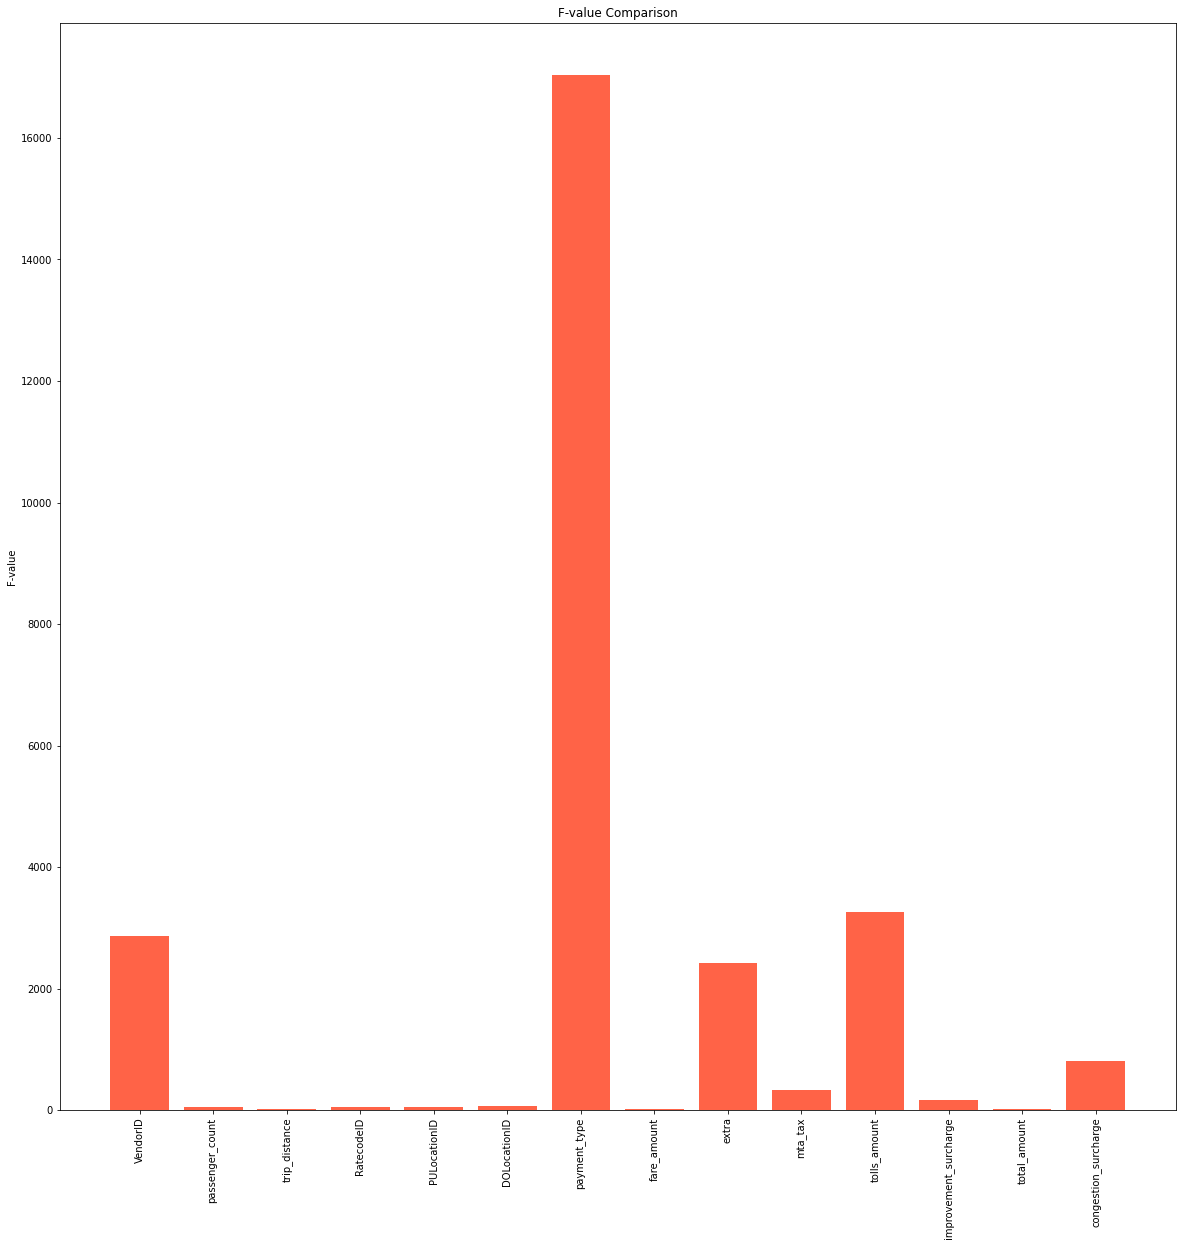

In [57]:
plt.figure(figsize=(20,20))
plt.bar(x=X_data.columns, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

Метод ANOVA F-value показал, что payment_type (способ оплаты) имеет высокую зависимость с признаком tip_amount (сумма чаевых), поэтому признак payment_type остается.

## 1.2.3 Variance Threshold

Метод порога дисперсии удаляет объекты, дисперсия которых ниже предварительно определенного порогового значения. Он основан на представлении о том, что признаки, которые не сильно различаются внутри себя, имеют низкую предсказательную силу. Основная слабость порога дисперсии заключается в том, что он не учитывает взаимосвязь входных признаков с выходными.

In [59]:
selector = VarianceThreshold()

selector.fit_transform(X_data)

for feature in zip(X_data.columns, selector.variances_):
    print(feature)

('VendorID', 0.21376919348597165)
('passenger_count', 1.0678576827074322)
('trip_distance', 1533.312348048372)
('RatecodeID', 3.877251200451573)
('PULocationID', 264.0)
('DOLocationID', 264.0)
('payment_type', 0.22241370321072843)
('fare_amount', 33626.48733667062)
('extra', 1.5579064977516686)
('mta_tax', 0.0062955195854676555)
('tolls_amount', 3.025149971310228)
('improvement_surcharge', 0.0017342906078113313)
('total_amount', 33701.129454380694)
('congestion_surcharge', 0.5308598602254933)


### Визуализация результата Variance Threshold

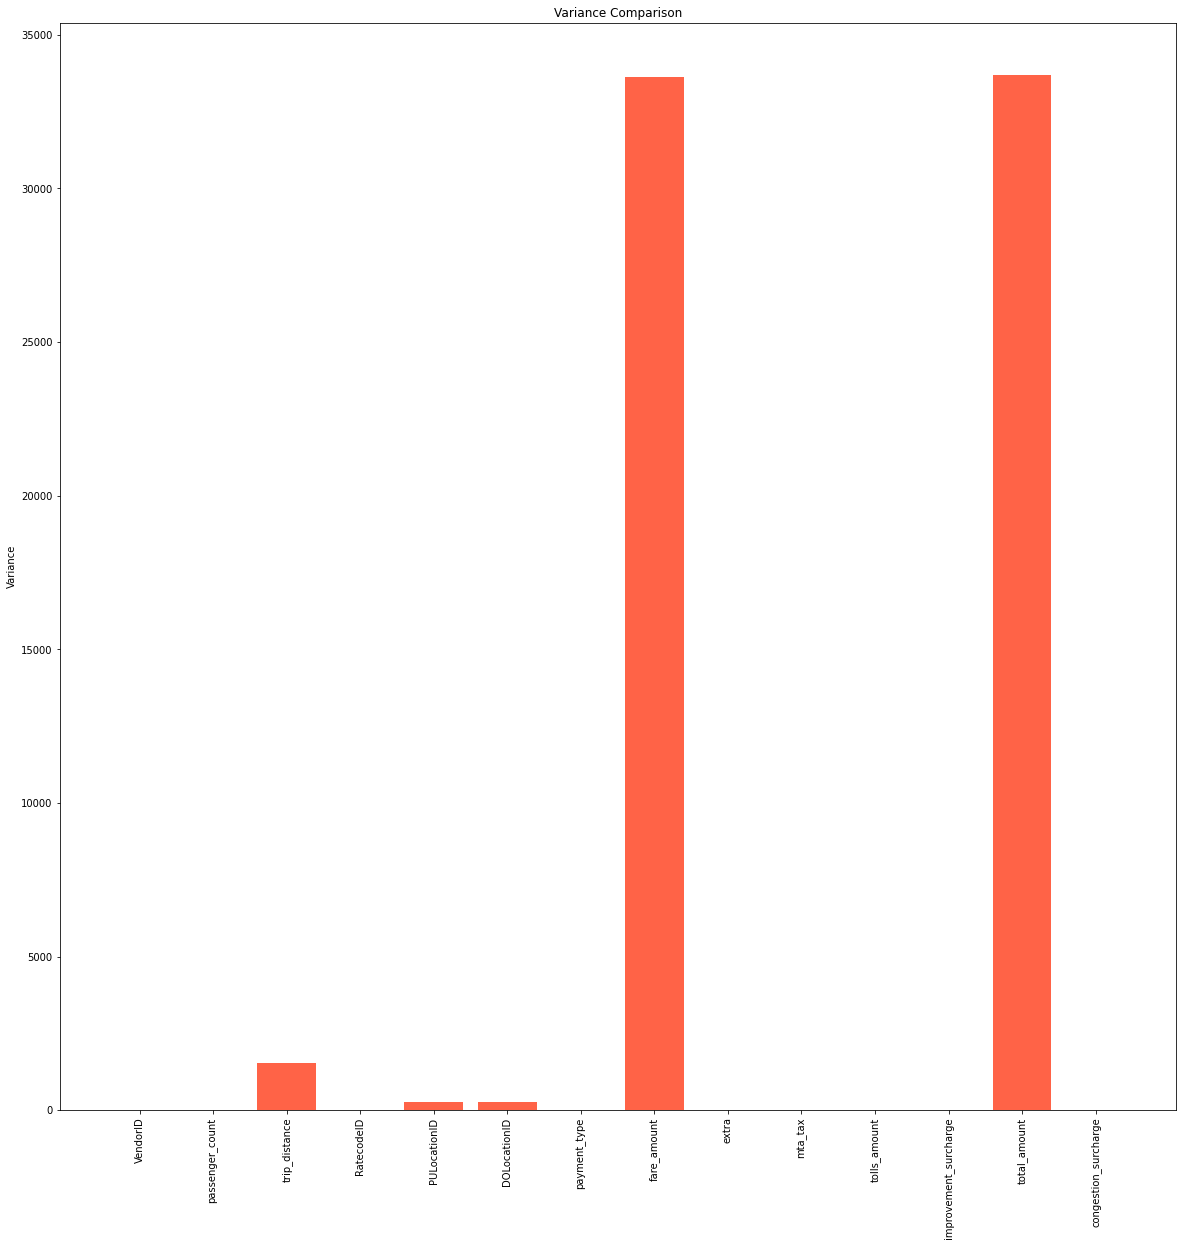

In [61]:
plt.figure(figsize=(20,20))
plt.bar(x=X_data.columns, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

Метод Variance Threshold показал, что значения в fare_amouont (тариф) и total_amount (стоимость проезда) имеют различия, что хорошо скажется на предсказание модели, поэтому эти признаки тоже остаются. Также относительно большие различия имеет признак trip_distance (дистанция поездки), поэтому он тоже остается.

## 1.2.4 Использование объекта Selector для выбора функций

Используется SelectKBest из Scikit-learn, чтобы выбрать функции в соответствии с k наивысшими оценками, определенными методом фильтрации.

In [70]:
skb = SelectKBest(score_func=f_classif, 
                  k=7)                  

X_data_new = skb.fit_transform(X_data, y_data)

print('Количество признаков до отбора: {}'.format(X_data.shape[1]))
print('Количество признаков после отбора: {}'.format(X_data_new.shape[1]))

Количество признаков до отбора: 14
Количество признаков после отбора: 7


In [71]:
for feature_list_index in skb.get_support(indices=True):
    print('- ' + X_data.columns[feature_list_index])

- VendorID
- payment_type
- extra
- mta_tax
- tolls_amount
- improvement_surcharge
- congestion_surcharge


Все эти признаки остаются кроме VendorID, так как он не несет важной информации.

## Удаление атрибутов

Создается новый датафрейм с удаленными признаками

Удаляются признаки PULocationID, DOLocationID, VendorID, RatecodeID, passenger_count так как методы ANOVA F-value и Variance Threshold показали, что эти признаки не несут важной информации для модели.

In [10]:
df2 = df.drop(["PULocationID", "DOLocationID", "VendorID", "RatecodeID", "passenger_count"], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425377 entries, 0 to 30801700
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 4.2+ GB


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425377 entries, 0 to 30801700
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   store_and_fwd_flag     object 
 4   payment_type           float64
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  total_amount           float64
 12  congestion_surcharge   float64
dtypes: float64(10), object(3)
memory usage: 3.1+ GB


В итоге был получен набор данных состоящий из 29425377 записей и 13 атрибутов.

# 1.3 Предварительная обработка данных

## 1.3.1 Разведочный анализ данных

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425377 entries, 0 to 30801700
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   store_and_fwd_flag     object 
 4   payment_type           float64
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  total_amount           float64
 12  congestion_surcharge   float64
dtypes: float64(10), object(3)
memory usage: 3.1+ GB


У атрибутов tpep_pickup_datetime и tpep_dropoff_datetime тип object который нужно заменить на тип datetime, а также атрибуту store_and_fwd_flag присвоить целочисленный тип.

In [26]:
df2.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

Все пустые значения были уже удалены.

### Графики распределения переменных

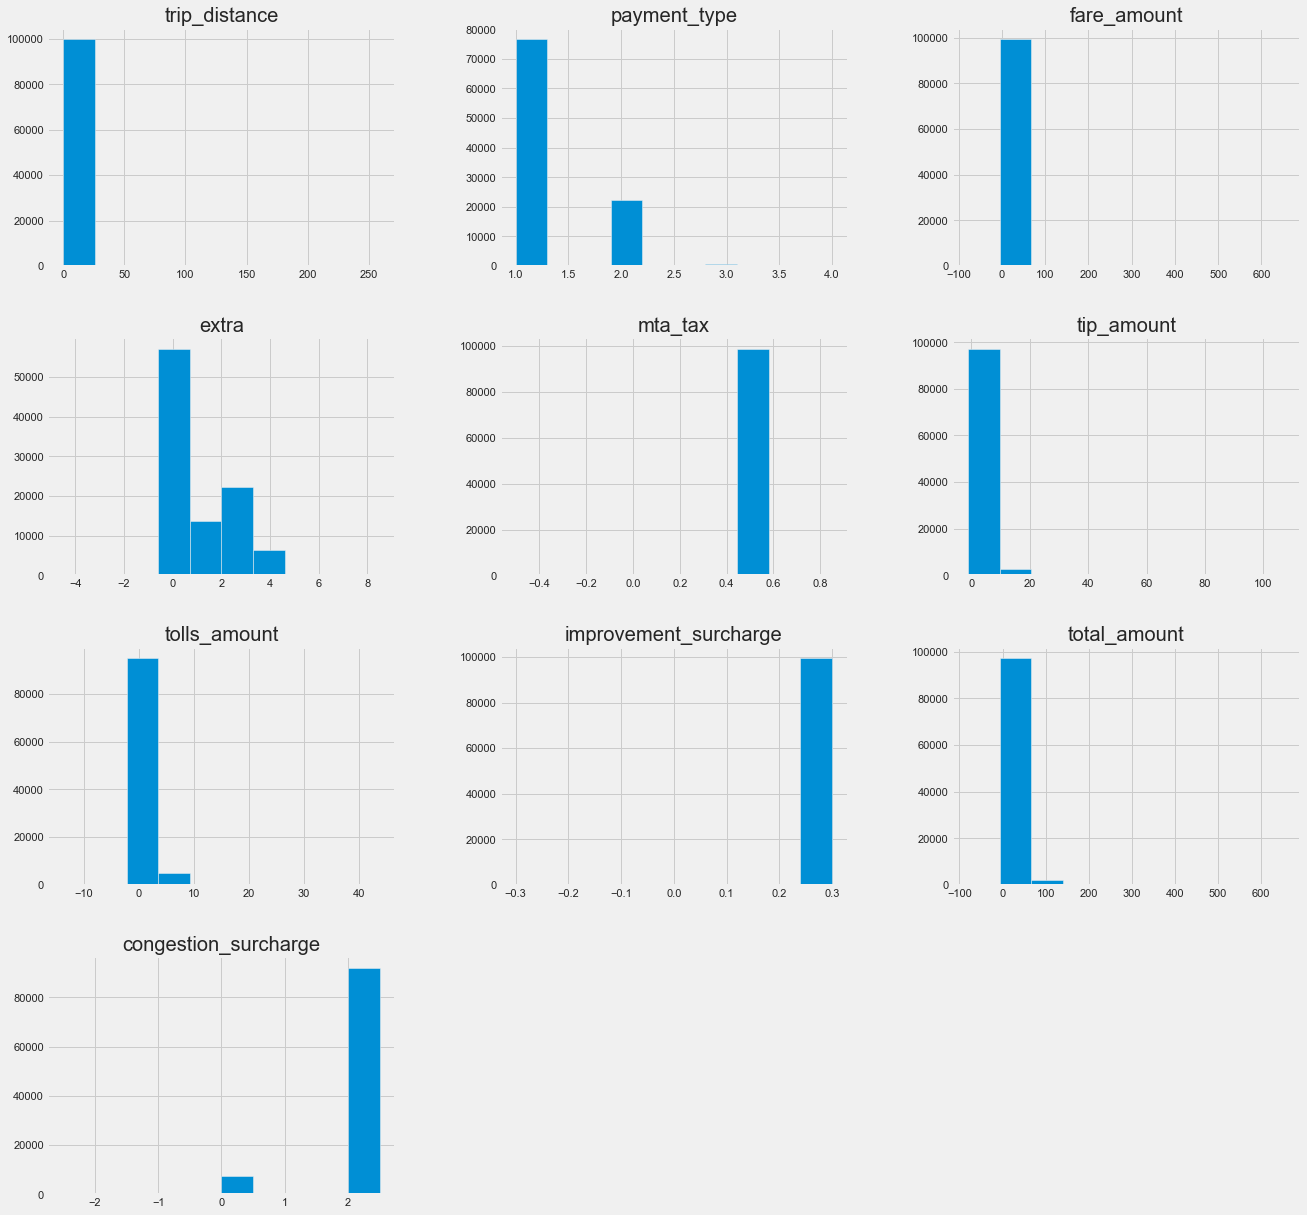

In [52]:
sample_data = df2.sample(n=100000)
sample_data.hist(figsize=(20, 20))
plt.show()

Наблюдаются выбросы у признаков fare_amount, extra, mta_tax, tolls_amount, improvement_surcharge, total_amount и congestion_surcharge так как они не могут быть отрицательными.

### Графики зависимости

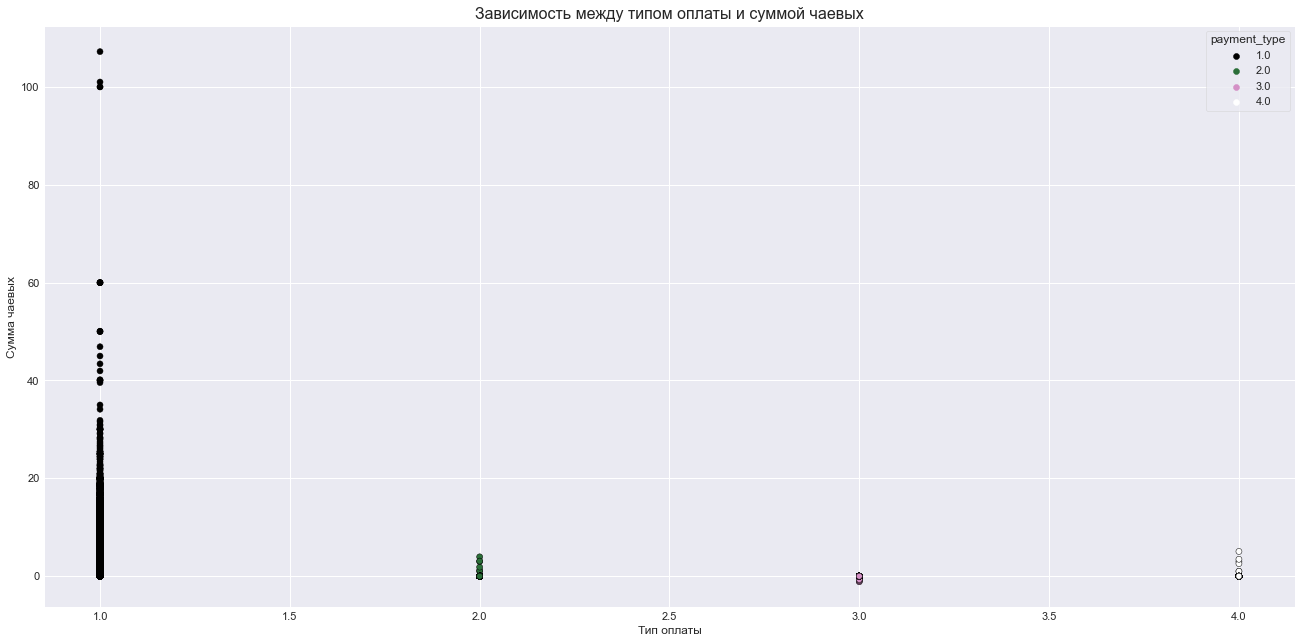

In [54]:
sns.set_style('darkgrid')
plt.title('Зависимость между типом оплаты и суммой чаевых',size=16)
plt.xlabel('Тип оплаты',size=12)
plt.ylabel('Сумма чаевых',size=12)
sns.scatterplot(x='payment_type', y='tip_amount', data=sample_data, hue='payment_type', edgecolor='black', palette='cubehelix')
plt.show()

На графике видно, что больше всего чаевых оставляли пассажиры, которые оплачивали 1 способом оплаты.

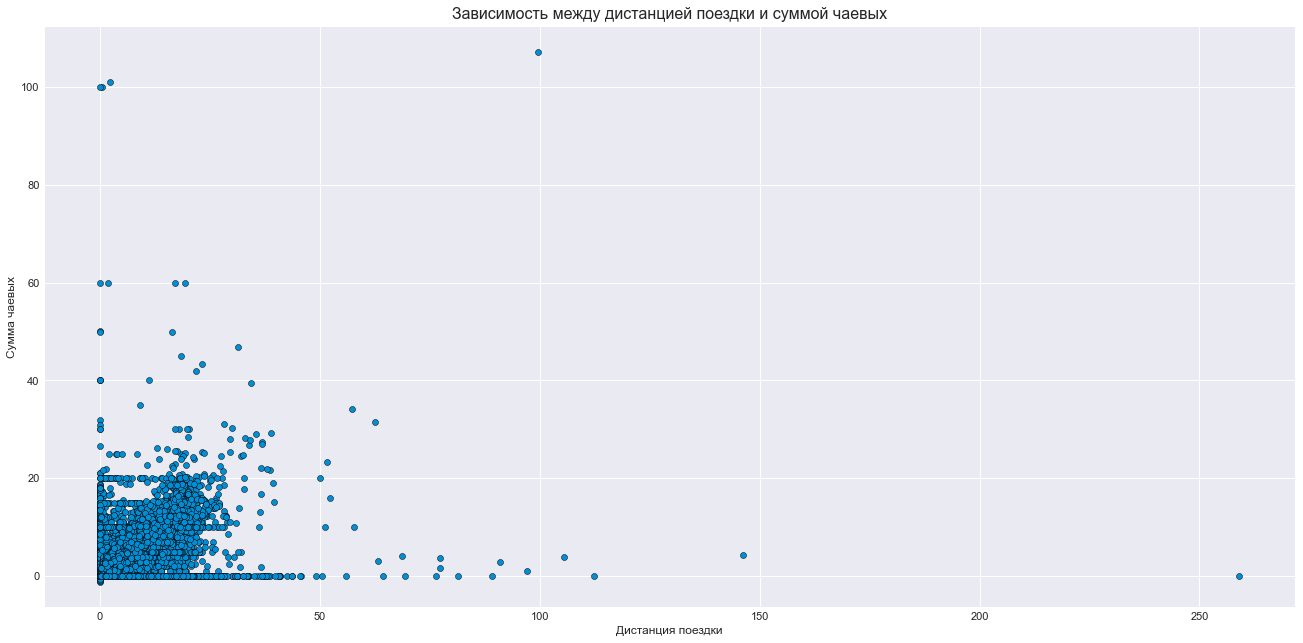

In [55]:
sns.set_style('darkgrid')
plt.title('Зависимость между дистанцией поездки и суммой чаевых',size=16)
plt.xlabel('Дистанция поездки',size=12)
plt.ylabel('Сумма чаевых',size=12)
sns.scatterplot(x='trip_distance', y='tip_amount', data=sample_data, edgecolor='black', palette='cubehelix')
plt.show()

На графике видно, что чем больше дистанция поездки тем меньше пассажиры оставляют чаевых или вовсе их не оставляют.

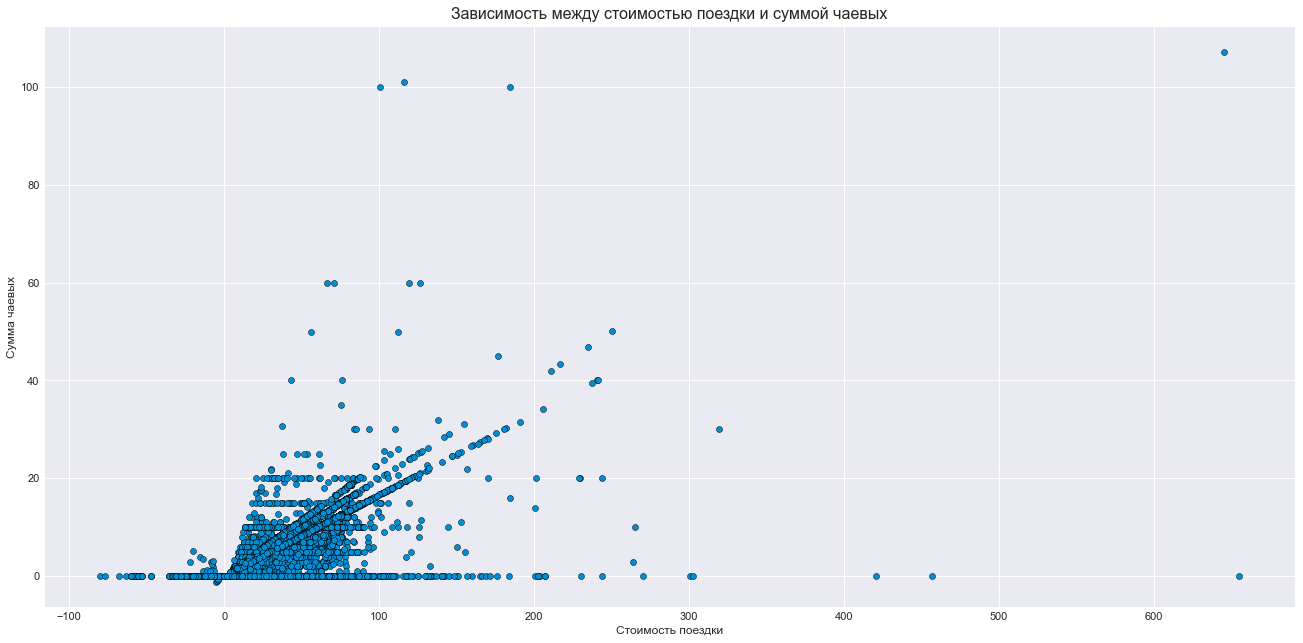

In [56]:
sns.set_style('darkgrid')
plt.title('Зависимость между стоимостью поездки и суммой чаевых',size=16)
plt.xlabel('Стоимость поездки',size=12)
plt.ylabel('Сумма чаевых',size=12)
sns.scatterplot(x='total_amount', y='tip_amount', data=sample_data, edgecolor='black', palette='cubehelix')
plt.show()

На данной диаграмме наблюдаются выбросы, так как стоимость поездки не может быть отрицательной, а также видно, что чем дороже стоит поездка, тем больше сумма чаевых.

### Процент дубликатов

In [58]:
duplicate_percentage = df2.duplicated().mean() * 100

print(f"Процент дубликатов: {duplicate_percentage}%")

Процент дубликатов: 4.0781125760937574e-05%


### План предварительной обработки данных

В итоге предстоит выполнить:
1. Обработать категориальные признаки - для корректной работы в качестве входных данных должны передаваться только численные признаки, поэтому необходимы преобразования.


2. Удаление дубликатов


3. Обработка временных признаков - для дальнейшей работы с временными признаками необходимо преобразовать их тип из object в datetime а также изменить формат даты.


4. Обработка выбросов

## 1.3.2 Обработка категориальных признаков

В данном наборе данных содержится категориальный признак store_and_fwd_flag, который нужно обработать.

In [11]:
le = LabelEncoder()
le.fit(df2['store_and_fwd_flag'])

LabelEncoder()

In [12]:
df2['store_and_fwd_flag']=le.transform(df2['store_and_fwd_flag'])

In [13]:
df2['store_and_fwd_flag'].unique()

array([0, 1])

## 1.3.3 Удаление дубликатов

In [74]:
duplicateRows = df2[df2.duplicated()]

In [75]:
duplicateRows

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1680114,02/08/2021 07:59:12 PM,02/08/2021 08:03:13 PM,0.80,0,2.0,5.0,0.5,0.5,0.00,0.0,0.3,6.30,0.0
2866764,03/03/2021 11:56:38 AM,03/03/2021 12:04:54 PM,0.60,0,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5
10188195,06/10/2021 03:07:07 PM,06/10/2021 03:10:03 PM,0.48,0,1.0,4.0,0.0,0.5,1.82,0.0,0.3,9.12,2.5
10190801,06/10/2021 03:57:39 PM,06/10/2021 04:04:55 PM,0.70,0,2.0,6.0,3.5,0.5,0.00,0.0,0.3,10.30,2.5
23502177,10/26/2021 09:15:34 PM,10/26/2021 09:28:33 PM,1.80,0,1.0,10.0,3.0,0.5,2.75,0.0,0.3,16.55,2.5
23612091,10/27/2021 09:17:40 PM,10/27/2021 09:23:06 PM,0.88,0,1.0,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5
24513645,11/03/2021 06:38:20 PM,11/03/2021 06:51:27 PM,1.72,0,2.0,10.0,1.0,0.5,0.00,0.0,0.3,14.30,2.5
24861228,11/06/2021 03:12:23 PM,11/06/2021 03:16:48 PM,0.70,0,2.0,5.0,2.5,0.5,0.00,0.0,0.3,8.30,2.5
25509002,11/12/2021 10:19:55 AM,11/12/2021 10:33:21 AM,1.60,0,1.0,10.0,2.5,0.5,1.50,0.0,0.3,14.80,2.5
27093911,11/26/2021 01:35:54 PM,11/26/2021 01:44:56 PM,0.76,0,2.0,7.0,0.0,0.5,0.00,0.0,0.3,10.30,2.5


In [14]:
df2 = df2.drop_duplicates()

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425365 entries, 0 to 30801700
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   store_and_fwd_flag     int32  
 4   payment_type           float64
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  total_amount           float64
 12  congestion_surcharge   float64
dtypes: float64(10), int32(1), object(2)
memory usage: 3.0+ GB


## 1.3.4 Обработка временных признаков

In [35]:
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")

ValueError: time data '2021-01-01 00:30:10' does not match format '%m/%d/%Y %I:%M:%S %p' (match)

In [16]:
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'], format="%m/%d/%Y %I:%M:%S %p")

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29425365 entries, 0 to 30801700
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   store_and_fwd_flag     int32         
 4   payment_type           float64       
 5   fare_amount            float64       
 6   extra                  float64       
 7   mta_tax                float64       
 8   tip_amount             float64       
 9   tolls_amount           float64       
 10  improvement_surcharge  float64       
 11  total_amount           float64       
 12  congestion_surcharge   float64       
dtypes: datetime64[ns](2), float64(10), int32(1)
memory usage: 3.0 GB


In [81]:
df2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,0,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,0,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,0,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,0,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


## 1.3.5 Обработка выбросов

In [17]:
df2.describe()

,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07,2.383890e+07
mean,2.747085e+00,1.028814e-02,1.280402e+00,1.213464e+01,1.093607e+00,5.143560e-01,2.093033e+00,2.663575e-01,2.974749e-01,1.791857e+01,2.271167e+00
std,4.407205e+01,1.009074e-01,4.843899e-01,2.786758e+02,1.024139e+02,1.024064e+02,2.633992e+00,1.526098e+00,3.806761e-02,3.459323e+02,7.473419e-01
min,-2.218000e+01,0.000000e+00,1.000000e+00,-1.259000e+03,-2.700000e+01,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,9.700000e-01,0.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,2.500000e+00
50%,1.600000e+00,0.000000e+00,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.415000e+01,2.500000e+00
75%,2.880000e+00,0.000000e+00,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.850000e+00,0.000000e+00,3.000000e-01,1.930000e+01,2.500000e+00
max,1.673295e+05,1.000000e+00,5.000000e+00,9.983100e+05,5.000008e+05,5.000005e+05,1.393560e+03,9.255000e+02,3.000000e-01,1.000004e+06,3.000000e+00


Аномалии наблюдаются у таких атрибутов как fare_amount, extra, tip_amount, tolls_amount, mta_tax, improvement_surcharge, total_amount, congestion_surcharge.

In [18]:
anomaly = ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'mta_tax', 'improvement_surcharge', 
           'total_amount', 'congestion_surcharge', 'trip_distance']

In [19]:
for a in anomaly:
    df2.loc[df2[a] < 0, a] = np.nan
    df2[a] = df2[a].fillna(df2[a].mean())

In [31]:
df2 = pd.read_csv('data2.csv')

In [20]:
def delete_outliers_value(df, columns_):
    index_ = set()
    
    for x in columns_:
        q75,q25 = np.percentile(df[x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        index_.update(df.loc[df[x] < min,x].index)
        index_.update(df.loc[df[x] > max,x].index)
    
    df.drop(index_, axis=0, inplace=True)
    return df

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29425365 entries, 0 to 29425364
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   store_and_fwd_flag     int64         
 4   payment_type           float64       
 5   fare_amount            float64       
 6   extra                  float64       
 7   mta_tax                float64       
 8   tip_amount             float64       
 9   tolls_amount           float64       
 10  improvement_surcharge  float64       
 11  total_amount           float64       
 12  congestion_surcharge   float64       
 13  month                  int64         
 14  passenger_count        float64       
dtypes: datetime64[ns](2), float64(11), int64(2)
memory usage: 3.3 GB


In [40]:
df2

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,passenger_count
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,0,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,1,1.0
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,1,1.0
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,0,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,1,1.0
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,0,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,1,0.0
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,0,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29425360,2021-12-31 23:27:31,2021-12-31 23:32:32,0.95,0,1.0,5.5,0.5,0.5,1.70,0.0,0.3,11.00,2.5,12,2.0
29425361,2021-12-31 23:20:49,2021-12-31 23:21:59,0.16,0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,6.80,2.5,12,1.0
29425362,2021-12-31 23:07:23,2021-12-31 23:12:45,1.05,0,1.0,6.0,0.5,0.5,2.45,0.0,0.3,12.25,2.5,12,2.0
29425363,2021-12-31 23:18:30,2021-12-31 23:31:20,2.31,0,1.0,11.0,0.5,0.5,1.00,0.0,0.3,15.80,2.5,12,1.0


In [37]:
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

In [38]:
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

In [41]:
for d in df.columns:
    df2 = delete_outliers_value(df2, df2.columns)

In [42]:
df2

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,passenger_count
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,0,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,1,1.0
15,2021-01-01 00:17:48,2021-01-01 00:21:55,1.01,0,1.0,5.5,0.5,0.5,1.00,0.0,0.3,10.30,2.5,1,1.0
16,2021-01-01 00:33:38,2021-01-01 00:38:37,0.73,0,1.0,5.5,0.5,0.5,2.79,0.0,0.3,12.09,2.5,1,1.0
17,2021-01-01 00:47:56,2021-01-01 00:52:53,1.17,0,1.0,6.5,0.5,0.5,2.06,0.0,0.3,12.36,2.5,1,1.0
18,2021-01-01 00:04:21,2021-01-01 00:07:58,0.78,0,1.0,4.5,0.5,0.5,1.66,0.0,0.3,9.96,2.5,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29425349,2021-12-31 23:03:09,2021-12-31 23:18:06,2.73,0,1.0,12.0,0.5,0.5,3.95,0.0,0.3,19.75,2.5,12,1.0
29425352,2021-12-31 23:32:59,2021-12-31 23:48:43,3.53,0,1.0,13.5,0.5,0.5,3.46,0.0,0.3,20.76,2.5,12,1.0
29425354,2021-12-31 23:34:36,2021-12-31 23:38:13,0.82,0,1.0,5.0,0.5,0.5,1.00,0.0,0.3,9.80,2.5,12,1.0
29425355,2021-12-31 23:24:22,2021-12-31 23:31:08,1.43,0,1.0,7.0,0.5,0.5,2.70,0.0,0.3,13.50,2.5,12,1.0


In [24]:
df2.describe()

,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.319712e+07,13197116.0,13197116.0,1.319712e+07,1.319712e+07,13197116.0,1.319712e+07,13197116.0,1.319712e+07,1.319712e+07,13197116.0
mean,1.551730e+00,0.0,1.0,8.348773e+00,1.132217e+00,0.5,2.151933e+00,0.0,3.000000e-01,1.411754e+01,2.5
std,8.069351e-01,0.0,0.0,2.989784e+00,1.239524e+00,0.0,8.638798e-01,0.0,7.018897e-11,3.548385e+00,0.0
min,0.000000e+00,0.0,1.0,0.000000e+00,0.000000e+00,0.5,0.000000e+00,0.0,3.000000e-01,3.960000e+00,2.5
25%,9.000000e-01,0.0,1.0,6.000000e+00,0.000000e+00,0.5,1.620000e+00,0.0,3.000000e-01,1.130000e+01,2.5
50%,1.400000e+00,0.0,1.0,8.000000e+00,5.000000e-01,0.5,2.070000e+00,0.0,3.000000e-01,1.356000e+01,2.5
75%,2.060000e+00,0.0,1.0,1.050000e+01,2.500000e+00,0.5,2.750000e+00,0.0,3.000000e-01,1.656000e+01,2.5
max,3.800000e+00,0.0,1.0,1.725000e+01,4.140000e+00,0.5,4.420000e+00,0.0,3.000000e-01,2.440000e+01,2.5


В результате отрицательные значения были заменены на средние значения столбца.

In [86]:
df2.shape

(29425365, 13)

In [43]:
df2.to_csv('data2021.csv', index=False)

В результате был получен набор данных состоящий из 29425365 записей и 13 атрибутов.

# 1.4  Определение численных характеристик наборов данных

Районы, из которых чаще всего производилась посадка пассажиров, где чаевых было
оставлено не менее 15% от суммы оплаты за поездку (длина поездки не должна
превышать 2 км);

In [87]:
filtered_data1 = df2[(df2['trip_distance'] <= 2) & (df2['tip_amount'] >= 0.15 * df2['total_amount'])]
record_count = len(filtered_data1)
print(f"Количество записей: {record_count}")

Количество записей: 9187159


Стоимость на километр поездки не превышала среднюю стоимость всех поездок на
километр по такому же тарифу;


In [88]:
mean_fare_per_km = df2['fare_amount'].mean() / df2['trip_distance'].mean()
filtered_data = df2[df2['fare_amount'] / df2['trip_distance'] <= mean_fare_per_km]
record_count = len(filtered_data)
print(f"Количество записей: {record_count}")

Количество записей: 7901827


Среднее количество пассажиров на поездку, пользующихся услугами такси с самыми
популярными тарифами.

In [89]:
popular_tariffs = df['fare_amount'].value_counts().index[:5]
filtered_data = df[df['fare_amount'].isin(popular_tariffs)]
mean_passengers = filtered_data['passenger_count'].mean()
record_count = len(filtered_data)
print(f"Среднее количество пассажиров: {mean_passengers}")
print(f"Количество записей: {record_count}")

Среднее количество пассажиров: 1.4195160930076016
Количество записей: 7154598


## Динамика изменений по месяцам

In [27]:
df2['month'] = df2['tpep_pickup_datetime'].dt.month

In [28]:
df2['passenger_count'] = df['passenger_count']

In [29]:
df2.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
month                    0
passenger_count          0
dtype: int64

In [96]:
print("Динамика изменений по месяцам:")
print("")
df3 = pd.DataFrame()
col1 = []
col2 = []
mp = []
col3 = []
for month in range(1, 13):
    
    print(f"Месяц {month}:")
    filtered_data1 = df2[(df2['month'] == month) & (df2['trip_distance'] <= 2) & (df2['tip_amount'] >= 0.15 * df2['total_amount'])]
    record_count = len(filtered_data1)
    print(f"Количество записей районов, из которых чаще всего производилась посадка пассажиров, где чаевых было оставлено не менее 15% от суммы оплаты за поездку (длина поездки не должна превышать 2 км): {record_count}")
    col1.append(record_count)
    
    filtered_data2 = df2[df2['month'] == month]
    mean_fare_per_km = filtered_data2['fare_amount'].mean() / filtered_data2['trip_distance'].mean()
    filtered_data = filtered_data2[filtered_data2['fare_amount'] / filtered_data2['trip_distance'] <= mean_fare_per_km]
    record_count = len(filtered_data)
    print(f"Количество записей где стоимость на километр поездки не превышала среднюю стоимость всех поездок на километр по такому же тарифу;: {record_count}")
    col2.append(record_count)
    
    popular_tariffs = filtered_data2['fare_amount'].value_counts().index[:5]
    filtered_data = filtered_data2[filtered_data2['fare_amount'].isin(popular_tariffs)]
    mean_passengers = filtered_data['passenger_count'].mean()
    record_count = len(filtered_data)
    print(f"Среднее количество пассажиров пользующихся услугами такси с самыми популярными тарифами: {mean_passengers}")
    print(f"Количество записей пользующихся услугами такси с самыми популярными тарифами: {record_count}")
    mp.append(mean_passengers)
    col3.append(record_count)
    print("")
df3['col1'] = col1
df3['col2'] = col2
df3['mp'] = mp
df3['col3'] = col3

Динамика изменений по месяцам:

Месяц 1:
Количество записей районов, из которых чаще всего производилась посадка пассажиров, где чаевых было оставлено не менее 15% от суммы оплаты за поездку (длина поездки не должна превышать 2 км): 408876
Количество записей где стоимость на километр поездки не превышала среднюю стоимость всех поездок на километр по такому же тарифу;: 312120
Среднее количество пассажиров пользующихся услугами такси с самыми популярными тарифами: 1.4139622621200378
Количество записей пользующихся услугами такси с самыми популярными тарифами: 371616

Месяц 2:
Количество записей районов, из которых чаще всего производилась посадка пассажиров, где чаевых было оставлено не менее 15% от суммы оплаты за поездку (длина поездки не должна превышать 2 км): 414573
Количество записей где стоимость на километр поездки не превышала среднюю стоимость всех поездок на километр по такому же тарифу;: 323679
Среднее количество пассажиров пользующихся услугами такси с самыми популярными тар

In [97]:
df3

,col1,col2,mp,col3
0,408876,312120,1.413962,371616
1,414573,323679,1.411270,354971
2,581141,565185,1.398215,496990
3,653027,559605,1.405461,540395
4,751711,637797,1.423005,609069
5,844551,722454,1.430126,661027
6,807260,709928,1.449113,651212
7,789895,681400,1.425336,645776
8,856354,825486,1.418844,646396
9,1049535,880984,1.416276,759511


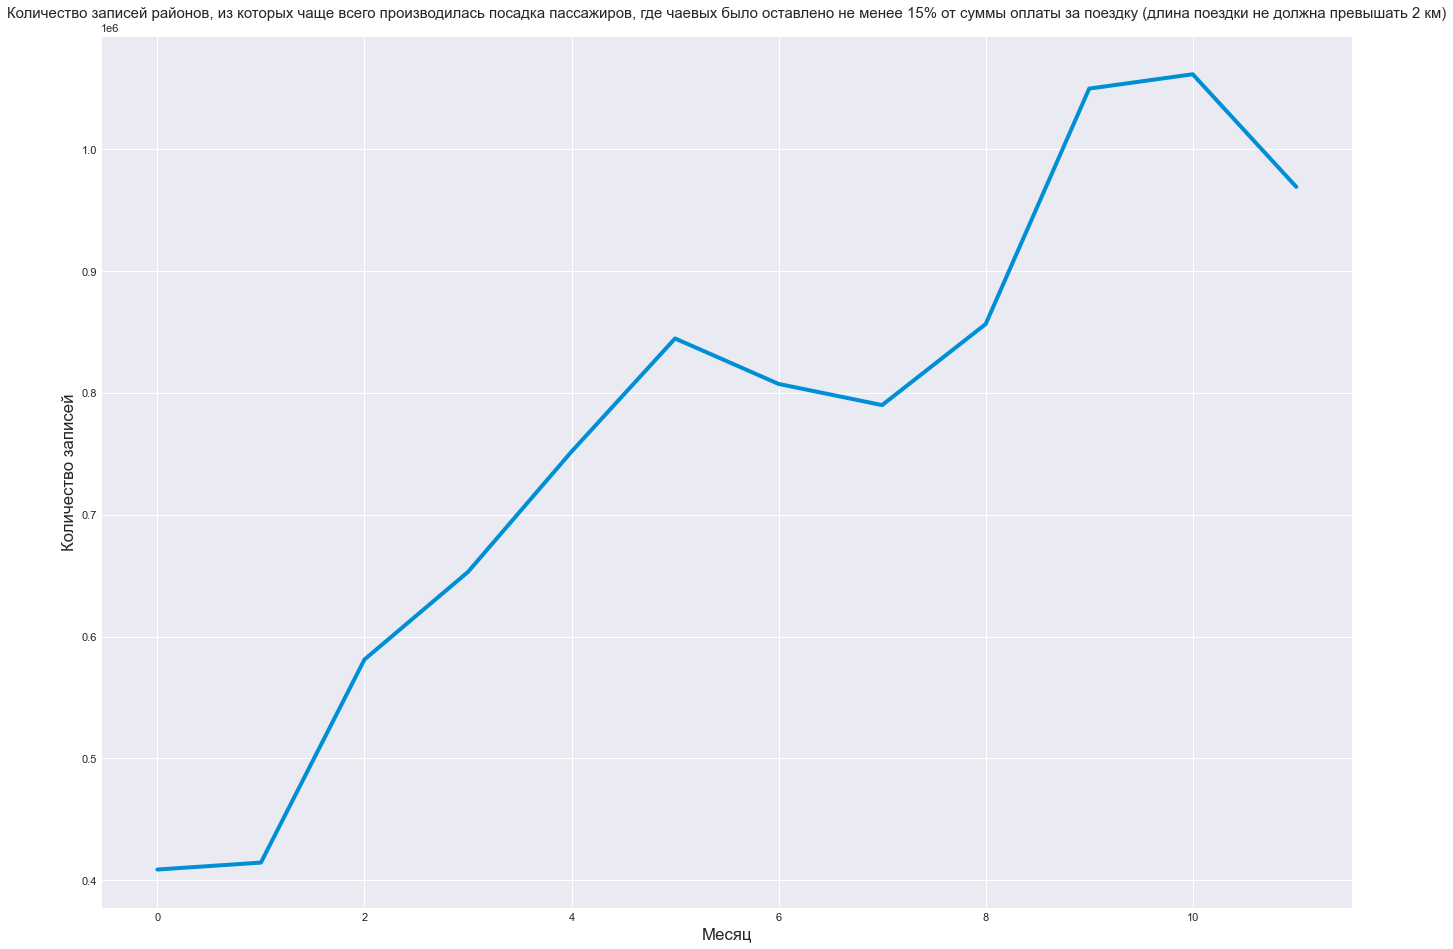

In [108]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(df3['col1'])

ax.set_xlabel('Месяц')
ax.set_ylabel('Количество записей')
plt.title("Количество записей районов, из которых чаще всего производилась посадка пассажиров, где чаевых было оставлено не менее 15% от суммы оплаты за поездку (длина поездки не должна превышать 2 км)", fontsize=15)
plt.show()

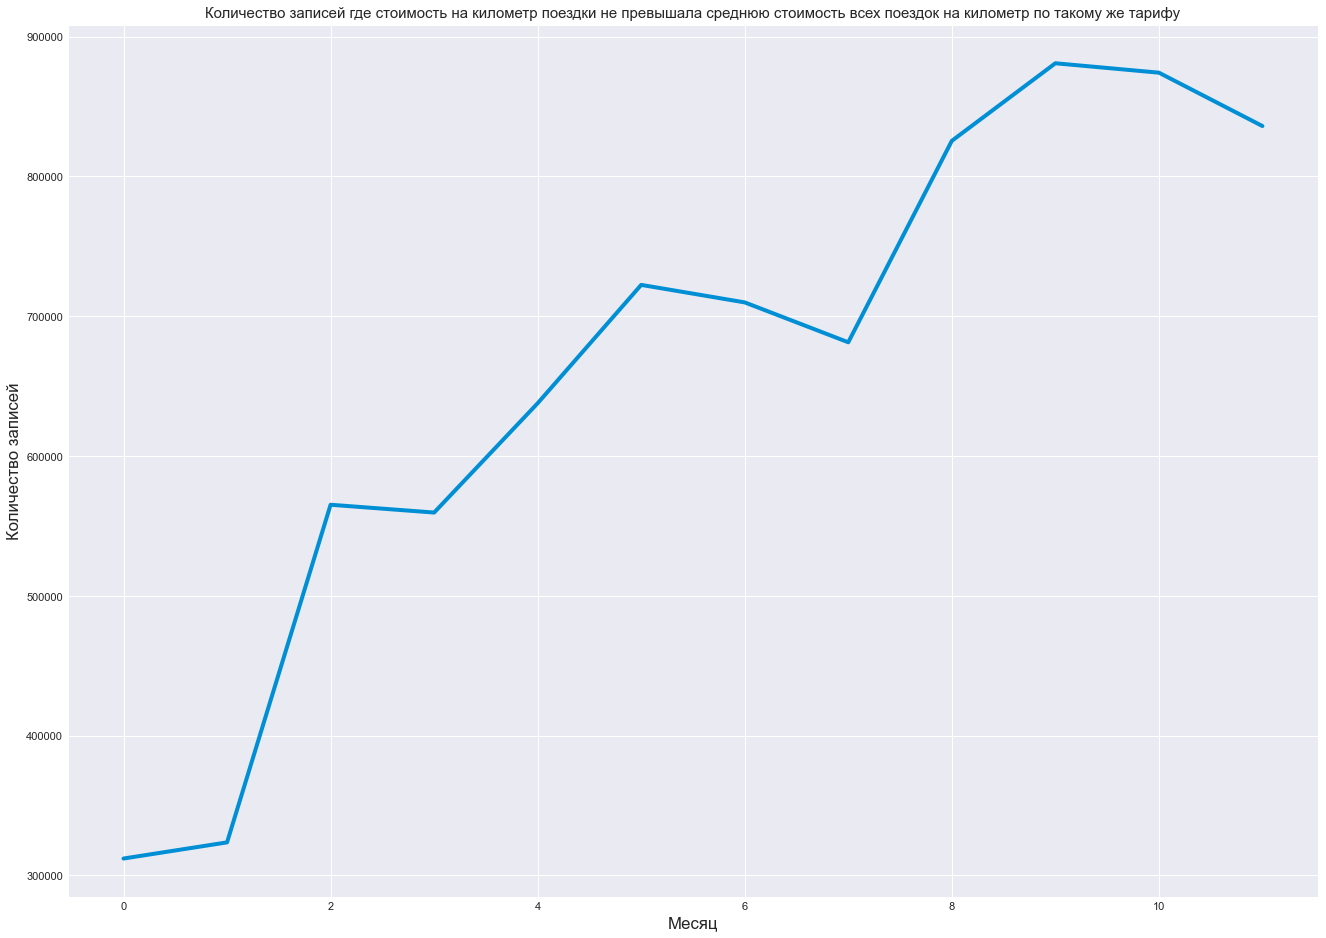

In [109]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(df3['col2'])

ax.set_xlabel('Месяц')
ax.set_ylabel('Количество записей')
plt.title("Количество записей где стоимость на километр поездки не превышала среднюю стоимость всех поездок на километр по такому же тарифу", fontsize=15)
plt.show()

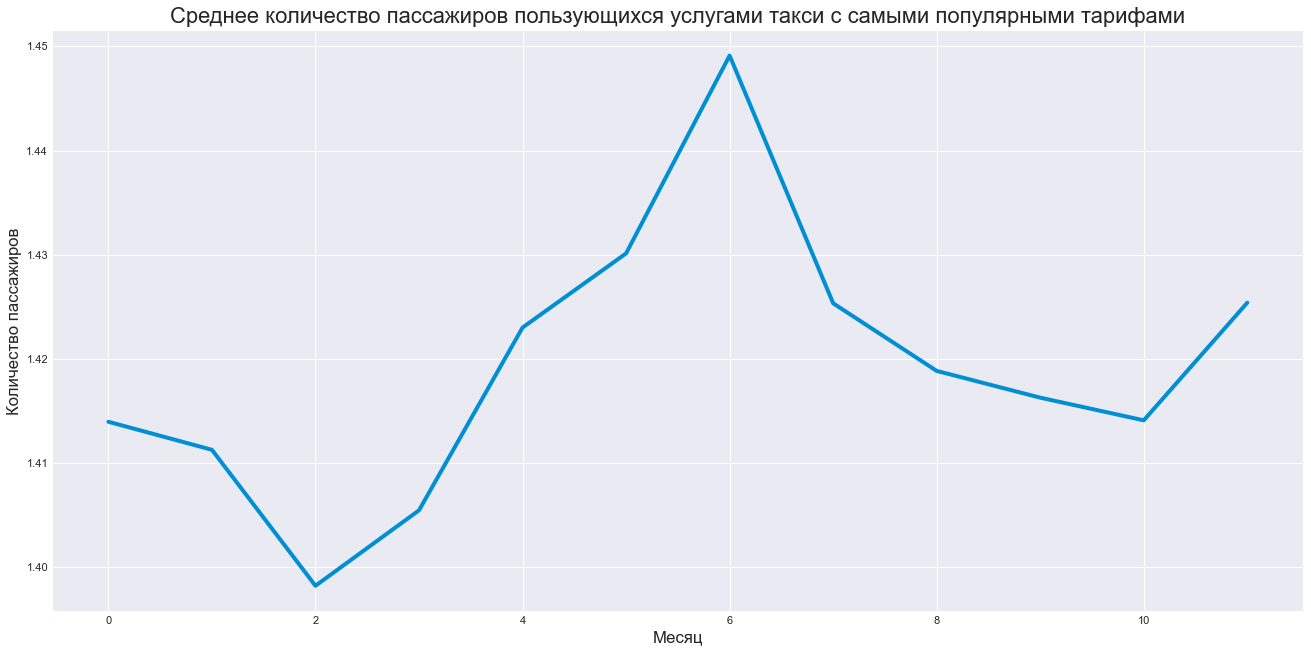

In [103]:
fig, ax = plt.subplots()

ax.plot(df3['mp'])

ax.set_xlabel('Месяц')
ax.set_ylabel('Количество пассажиров')
plt.title("Среднее количество пассажиров пользующихся услугами такси с самыми популярными тарифами", fontsize=22)
plt.show()

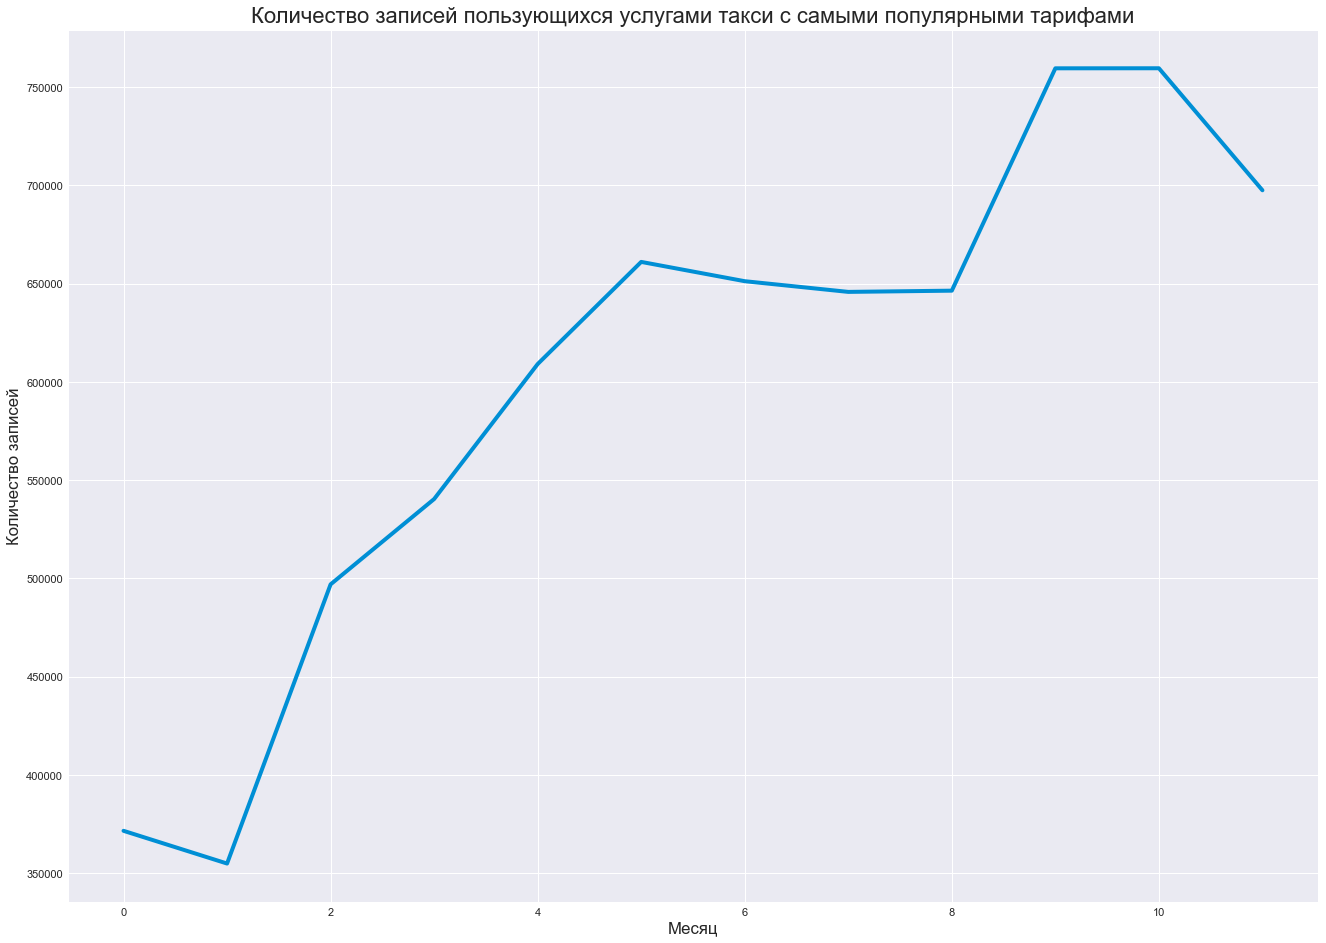

In [111]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(df3['col3'])

ax.set_xlabel('Месяц')
ax.set_ylabel('Количество записей')
plt.title("Количество записей пользующихся услугами такси с самыми популярными тарифами", fontsize=22)
plt.show()

In [30]:
df2.to_csv('data2020.csv', index=False)

# 1.5 Отчет

## 1.5.1 Отчет о загрузке данных

1. Загрузка датафрейма из csv-файла.

2. Вывод информации о датафрейме

В исходном наборе данных содержится 30904072 записей и 18 атрибутов.

3. Вывод информации о количестве пропущенных значение в наборе данных

Пропущенные данные имеют признаки VendorID, passenger_count, RatecodeID, store_and_fwd_flag, payment_type и congestion_surcharge.

4. Описание структуры набора данных

В итоге был загружен набор данных из csv-файла содержащий информацию о о поездках на такси за 2021 год. В исходном наборе данных содержится 30904072 записей и 18 атрибутов.

## 1.5.2 Отчет о формировании структуры набора данных

1. Обработка пропусков

Пропуски данных имеют такие атрибуты как VendorID (12.4%), passenger_count (21.9%), RatecodeID (21.9%), store_and_fwd_flag (21.9%), payment_type (12.4%), congestion_surcharge (9.6%).

Удаление записей с пустыми значениями

2. Отбор атрибутов методом ANOVA F-value

В качестве целевой переменной берется tip_amount - сумма чаевых.

Метод ANOVA F-value показал, что payment_type (способ оплаты) имеет высокую зависимость с признаком tip_amount (сумма чаевых), поэтому признак payment_type остается.

3. Отбор атрибутов методом Variance Threshold

Метод Variance Threshold показал, что значения в fare_amouont (тариф) и total_amount (стоимость проезда) имеют различия, что хорошо скажется на предсказание модели, поэтому эти признаки тоже остаются. Также относительно большие различия имеет признак trip_distance (дистанция поездки), поэтому он тоже остается.

4. Использование SelectKBest для выбор атрибутов


5. Удаление атрибутов

Создается новый датафрейм с удаленными признаками

Удаляются признаки PULocationID, DOLocationID, VendorID, RatecodeID, passenger_count так как методы ANOVA F-value и Variance Threshold показали, что эти признаки не несут важной информации для модели.

В итоге было удалено 5 атрибутов, которые не несут важной информации, а всего осталось 13 атрибутов.
 Был получен набор данных состоящий из 29425377 записей и 13 атрибутов.

## 1.5.3 Отчет о предварительной обработки данных

1. Разведочный анализ данных

У атрибутов tpep_pickup_datetime и tpep_dropoff_datetime тип object который нужно заменить на тип datetime, а также атрибуту store_and_fwd_flag присвоить целочисленный тип.

Построены графики распределения переменных

Наблюдаются выбросы у признаков fare_amount, extra, mta_tax, tolls_amount, improvement_surcharge, total_amount и congestion_surcharge так как они не могут быть отрицательными.

Построены графики зависимости

График зависимости способа оплаты и суммы чаевых показал, что больше всего чаевых оставляли пассажиры, которые оплачивали 1 способом оплаты.

График зависимости дистанции поездки и суммы чаевых показал, что чем больше дистанция поездки тем меньше пассажиры оставляют чаевых или вовсе их не оставляют.

На графике зависимости стоимости поездки и суммы чаевых наблюдаются выбросы, так как стоимость поездки не может быть отрицательной, а также видно, что чем дороже стоит поездка, тем больше сумма чаевых.

Процент дубликатов: 4.0781125760937574e-05%


2. Составлен план предварительной обработки данных

предстоит выполнить:

- Обработать категориальные признаки - для корректной работы в качестве входных данных должны передаваться только численные признаки, поэтому необходимы преобразования.

- Удаление дубликатов

- Обработка временных признаков - для дальнейшей работы с временными признаками необходимо преобразовать их тип из object в     datetime а также изменить формат даты.

- Обработка выбросов

3. Обработка категориальных признаков

В данном наборе данных содержится категориальный признак store_and_fwd_flag, который обрабатывается.

4. Удаление дупликатов

Процент дубликатов: 4.0781125760937574e-05%

5. Обработка временных признаков

Признаки tpep_pickup_datetime и tpep_dropoff_datetime приводятся к типу datetime

6. Обработка выбросов

Аномалии наблюдаются у таких атрибутов как fare_amount, extra, tip_amount, tolls_amount, mta_tax, improvement_surcharge, total_amount, congestion_surcharge так как их минимальные значения отрицательные.

В результате отрицательные значения были заменены на средние значения столбца.

В результате категориальные признаки преобразованны в целочисленные, временные признаки преобразованны в правильный формат, удалены дпуликаты и обработаны выбросы.В итоге получен набор данных состоящий из 29425365 записей и 13 атрибутов.

## 1.5.4 Отчет об определении численных характеристик наборов данных

1. Написаны алгоритмы для определения количества записей где:

- Районы, из которых чаще всего производилась посадка пассажиров, где чаевых было оставлено не менее 15% от суммы оплаты за поездку (длина поездки не должна превышать 2 км);

- Стоимость на километр поездки не превышала среднюю стоимость всех поездок на километр по такому же тарифу;

- Среднее количество пассажиров на поездку, пользующихся услугами такси с самыми популярными тарифами.

2. Динамика изменений по месяцам

Из полученных численных значений получена динамика изменения по месяцам 2021 года

In [2]:
df = pd.read_csv('data2.csv')

In [5]:
!pip install fastparquet

     -------------------------------------- 620.5/620.5 kB 1.3 MB/s eta 0:00:00
     --------------------------------------- 10.8/10.8 MB 32.7 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\anaconda\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



     ---------------------------------------- 1.2/1.2 MB 82.6 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


In [10]:
import pyarrow as pa
import pyarrow.parquet as pq

In [9]:
!pip install pyarrow

     --------------------------------------- 21.5/21.5 MB 12.1 MB/s eta 0:00:00


In [12]:
table = pa.Table.from_pandas(df)

In [13]:
pq.write_table(table, 'data2.parquet')

In [3]:
df.to_pickle('data2.pkl')

In [4]:
sample_data = df.sample(n=100000)

In [5]:
sample_data.to_csv('sample_data.csv', index=False)

In [3]:
df1 = pd.read_csv('data2020.csv')

In [4]:
df2 = pd.read_csv('data2021.csv')

In [5]:
new_df = pd.concat([df1, df2], ignore_index=True)

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25145892 entries, 0 to 25145891
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   store_and_fwd_flag     int64  
 4   payment_type           float64
 5   fare_amount            float64
 6   extra                  float64
 7   mta_tax                float64
 8   tip_amount             float64
 9   tolls_amount           float64
 10  improvement_surcharge  float64
 11  total_amount           float64
 12  congestion_surcharge   float64
 13  month                  int64  
 14  passenger_count        float64
dtypes: float64(11), int64(2), object(2)
memory usage: 2.8+ GB


In [8]:
new_df.to_csv('data.csv', index=False)